### Task A: Clustering: Iris Dataset

Import libraries

In [117]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Load iris dataset

In [118]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Drop categorical data

In [119]:
#drop categorical data
df = iris_df.drop('species', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Normalise data

In [120]:
#normalise
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:] # all rows, and all columns except the first one i.e the index
x = np.nan_to_num(x) # handle missing values... replace NaN with zero... 
normalised_dataset = StandardScaler().fit_transform(x)
normalised_dataset

array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.44444970e+00],
       [-1.24957601e-01, -1.51186952e+00, -1.44444970e+00],
       [ 2.18907205e+00, -1.45500381e+00, -1.31297673e+00],
       [ 3.11468391e+00, -1.28440670e+00, -1.05003079e+00],
       [ 1.95766909e+00, -1.39813811e+00

Apply K-means clustering

In [121]:
num_of_clusters = 3
k_means = KMeans(init='k-means++', n_clusters=num_of_clusters, n_init= 12)
k_means.fit(normalised_dataset)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


Assign labels to each row in the dataframe

In [122]:
#assign labels to each row in the dataframe
df["cluster_km"] = labels
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster_km
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


Centroid values by averaging the features in each cluster.

In [123]:
#Centroid values by averaging the features in each cluster.
df.groupby('cluster_km').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster_km,,,,
0,5.016327,3.440816,1.467347,0.242857
1,6.713043,3.108696,5.526087,2.017391
2,5.852727,2.663636,4.321818,1.365455


Show distribution of clusters based on petal_width, and petal_length  

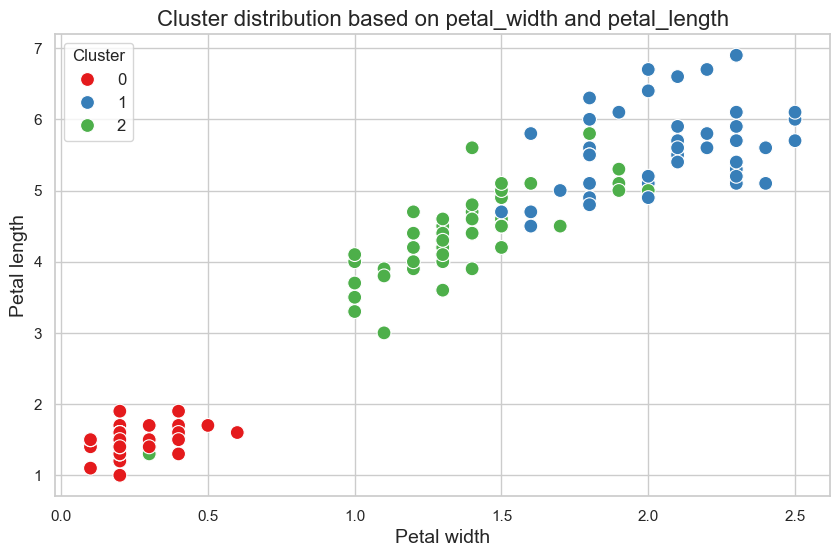

In [124]:
# plot distribution of clusters based on petal_width, and petal_length 

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='cluster_km', palette='Set1', s=100)

# Adding titles and labels
plt.title('Cluster distribution based on petal_width and petal_length', fontsize=16)
plt.xlabel('Petal width', fontsize=14)
plt.ylabel('Petal length', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()

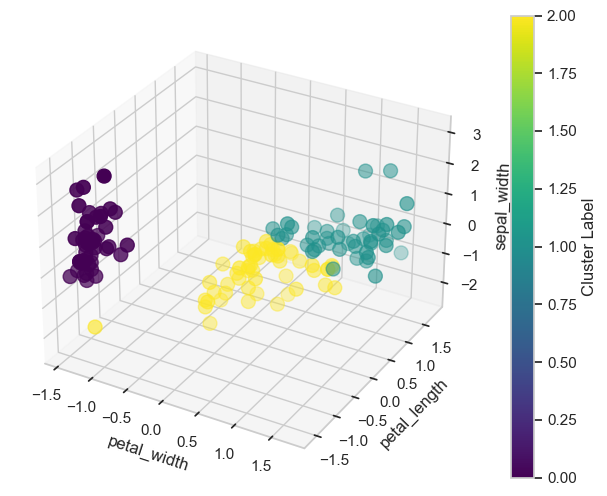

In [125]:
# Create the figure and add 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set labels for axes
ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_width')

# sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='cluster_km', palette='Set1', s=100)

# Create a scatter plot
scatter = ax.scatter(normalised_dataset[:, -1], normalised_dataset[:, -2], normalised_dataset[:, -3], c=labels, cmap='viridis', s=100)

# Create a color bar
plt.colorbar(scatter, label='Cluster Label')

# Show the plot
plt.show()

Compare clusters with species

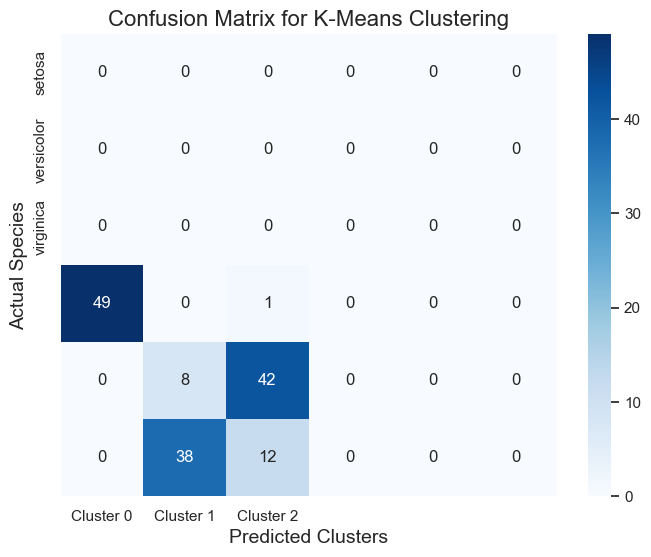

In [126]:
species = iris_df['species'].values  # Extract actual species labels and compare
# Convert predicted labels to strings
labels_str = [f'Cluster {label}' for label in labels]
# Create a confusion matrix
conf_matrix = confusion_matrix(species, labels_str)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_str), yticklabels=np.unique(species))
plt.title('Confusion Matrix for K-Means Clustering', fontsize=16)
plt.xlabel('Predicted Clusters', fontsize=14)
plt.ylabel('Actual Species', fontsize=14)
plt.show()